# Test bed for EM numerical algorithms

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1xnftEDtCWRNzep3NTsGI1UcFvopYw75o#scrollTo=IBS1-c8nAbnL)

TODO: https://en.wikipedia.org/wiki/Finite-difference_time-domain_method

https://en.wikipedia.org/wiki/Computational_electromagnetics



In [3]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
 
import sympy as sp
from sympy.abc import * # skip declaring symbols, eats up namespace though
#!pip install magpylib
import magpylib as em
 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

In [ ]:
# data paths, it may not load these
train_path = 'swarg_training_data.npz'                               
test_path = 'swarg_eval_data.npz'  

In [ ]:
# sympy test
x = symbols('x')
N = sp.integrate(sp.exp(-x**2),x)
N

sqrt(pi)*erf(x)/2

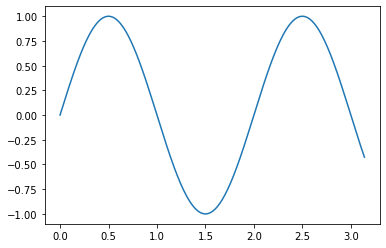

In [ ]:
# numpy test
x = np.arange(0, np.pi,.01)
y1 = np.sin(x)
y2 = np.sin(np.pi*x)
 
# matplotlib test
plt.plot(x,y2)

In [ ]:
# "This debug account can edit" - debug1500

## mark downn lang represent $\Omega$

In [ ]:
# test neural network stuff
def basemodel():
  model = Sequential()

  #Adding 20% dropout
  model.add(Dropout(0.20))

  #Add 1 layer with output 200 and relu function
  model.add(Dense(200,activation='relu'))

  #Adding 20% dropout here
  model.add(Dropout(0.20))

  #Add 1 layer with output 1 and sigmoid function
  model.add(Dense(1,activation='sigmoid'))

  return model

model = basemodel()

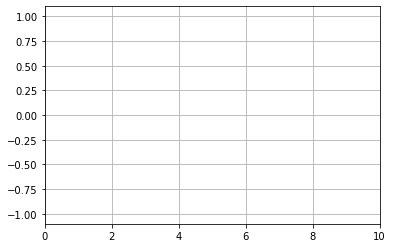

In [ ]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def data_gen():
    for cnt in itertools.count():
        t = cnt / 10
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, interval=10, init_func=init)
plt.show()